<a href="https://colab.research.google.com/github/feracor/1TareaFAO/blob/main/A01794022_semanas_03_04_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Fernando Acevedo Ortegate**
#A01794022


#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Procesamiento de Lenguaje Natural (NLP)**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad Semanas 03 y 04**

###**Pre-procesamiento, Matrices Documeto-Término (DTM) y TF-IDF.**

En esta actividad deberás utilizar los datos de tres archivos que se encuentran en Canvas:

*   **amazon_cells_labelled.txt** Contiene 1000 registros de comentarios de usuarios que adquirieron un producto a través de la plataforma de Amazon.

*   **imdb_labelled.txt** Contiene 1000 registros de comentarios que dejaron usuarios sobre palículas y series en la plataforma de IMBD.

*   **yelp_labelled.txt** Contiene 1000 comentarios de usuarios sobre servicios de comida dejados en l aplataforma de Yelp.

Igualmente son los archivos que encuentras en el Machine Learning Repository de la UCI, llamado "Sentiment Labelled Sentences": https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#



In [7]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords

import re
import string

In [8]:
nltk.download('punkt')    # es un tokenizador que ayuda a dividr el texto en enunciados mediante un modelo no-supervisado.
nltk.download('stopwords')    # para tener acceso a "stopwords" en varios idiomas.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Veamos la lista de stopwords que se incluyen de manera predeterminada la suite de librerías de NLTK:

print(len(stopwords.words('english')))
print(stopwords.words('english'))

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [10]:
# Consideremos la siguiente lista de palabras asociada a negaciones en inglés:

negwords = [ 'no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

##**Pregunta - 1:**




Excluye todas las palabras de la lista "negwords" de la lista predeterminada de "stopwords", para definir un nuevo conjunto llamado **mystopwords**, con el cual trabajaremos en esta Actividad:


In [11]:
################################################################################
# AGREGA AQUÍ TU LÍNEA O LÍNEAS DE CÓDIGO - Pregunta 1:

mystopwords = [i for i in stopwords.words('english') if i not in negwords]


# FIN PARA AGREGAR TU LÍNEA O LÍNEAS DE CÓDIGO.
################################################################################

print(len(mystopwords))
print(mystopwords)

139
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's

###**Cargamos los datos de Amazon**

In [12]:
# Puedes modificar en dado caso la ruta de los archivos:

dfa = pd.read_csv('amazon_cells_labelled.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')
dfi = pd.read_csv('imdb_labelled.txt', delimiter='\t', names=['review','label'], header=None, encoding='utf-8')
dfy = pd.read_csv('yelp_labelled.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')


print('Total de registros de Amazon:',dfa.shape)
print('Total de registros de IMBD:',dfi.shape)
print('Total de registros de Yelp:',dfy.shape)

Total de registros de Amazon: (1000, 2)
Total de registros de IMBD: (748, 2)
Total de registros de Yelp: (1000, 2)


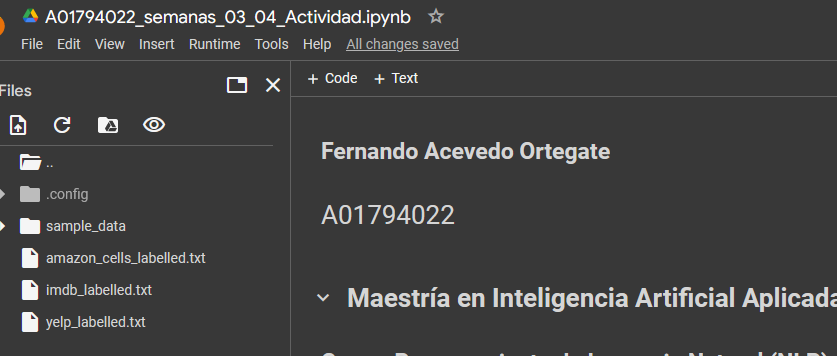

La salida anterior esperada es la siguiente:

Total de registros de Amazon: (1000, 2)

Total de registros de IMBD: (748, 2)

Total de registros de Yelp: (1000, 2)

In [13]:
dfa.head()     # Cada uno de estos data frame está formado de dos columnas,
               # uno con los comentarios (review) y otro con la etiqueta (label).
               # En particular aquí mostramos en el Amazon:

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


Sin embargo, observa que los registros de IMBD no son los 1000 que se indican en la documentación de estos datos, sino 748.

En realidad no son datos perdidos, sino que varios de ellos fueron capturados errónamente como uno solo. En ocasiones, la gran cantidad de caracteres especiales existentes en la actualidad generan este tipo de problemas.

Por ejemplo, observa la salida siguiente y cómo el registro de índice 19 tiene una gran cantidad de registros conjuntados como uno solo. Es decir, se conjuntó indebidamente información de las dos columnas del data frame.



In [14]:
dfi.values.tolist()[17:21]

[["I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
  1],
 ['It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.  ',
  1],
 [' The structure of this film is easily the most tightly constructed in the history of cinema.  \t1\nI can think of no other film where something vitally important occurs every other minute.  \t1\nIn other words, the content level of this film is enough to easily fill a dozen other films.  \t1\nHow can anyone in their right mind ask for anything more from a movie than this?  \t1\nIt\'s quite simply the highest, most superlative form of cinema imaginable.  \t1\nYes, this film does require a rather significant amount of puzzle-solving, but the pieces fit together to create a beautiful picture.  \t1\nThis short film certainly pulls no punches.  \t0\nGraphics is far from the best part of the game.  \t0\nThis is

Además, se observa que cada comentario (review) debe estar separado de su evaluación (label) por un tabulador "\t" y después separado del siguiente registro por un salto de línea "\n".

Usaremos esta información para separar de manera adecuada estos registros del conjunto de IMBD.

##**Pregunta - 2:**

En este ejercicio deberás corregir este problema que tienen los comentarios de IMBD, del cual se registran 748 comentarios, cuando deben ser 1000.

Como cada data frame tiene 2 columnas, el comentario y la evaluación, en algunas ocasiones el valor numérico de la evaluación se toma como parte del comentario y esto empieza a generar dichos errores.

El problema se puede intentar resolver de varias formas, sin embargo puedes al menos seguir los siguientes pasos para obtener de nuevo los 1000 comentarios en IMBD:


1.   Conjuntar en un solo string cada comentario (review) con su evaluación (label), separados por un tabulador "\t". Toma en cuenta que ambos deben ser del tipo de dato string.

2.   Separa cada uno de estos string con el método split() y con respecto al salto de línea "\n". Esto te debe llevar a que cada registro es ahora una lista con un solo string que contiene el comenario (review), seguido del tabulador y de la etiqueta (label). O bien, tienes una lista de varios string, donde cada string es un review, seguido por el tabulador y su label.

3.   Ahora separa cada cada uno de los string del paso anterior con respecto al tabulador "\t", para ya tener separados ahora sí, todos los comentarios (review) de su evaluación (label).

4.   Agrega cada uno de estos nuevos comentarios (review) y etiquetas (label) a la nueva lista que llamamos "newdfi".

El número de elementos de la nueva lista "newdfi" debe de ser de 1000, donde cada elemento está formado a su vez por una lista de dos elementos, donde el primero es un string del comentario (review) y el segundo es un número entero de la etiqueta (label).

Básicamente la idea fue conjuntar de nuevo la información de ambas columnas, para separarlas de nuevo de la manera adecuada.






In [15]:
tmpdfi = dfi.values.tolist()     # lista con los 748 registros.
newdfi=[]     # lista de salida que deberá tener los 1000 registros ya debidamente separados.



################################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 2:

set_tmpdfi = ['\t'.join([i[0],str(i[1])]) for i in tmpdfi] #1
new_tmpdfi = '\n'.join(set_tmpdfi) # Variable para realizar split
newdfi = [i.split('\t') for i in new_tmpdfi.split('\n')] #2 y 3
newdfi = [[i[0],int(i[1])] for i in newdfi] #4

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
################################################################################


print('La nueva lista tiene 1000 elementos:', (len(newdfi)==1000))

La nueva lista tiene 1000 elementos: True


In [16]:
# Verificando los registros donde habíamos detectado uno de los problemas:
newdfi[17:21]

[["I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
  1],
 ['It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.  ',
  1],
 [' The structure of this film is easily the most tightly constructed in the history of cinema.  ',
  1],
 ['I can think of no other film where something vitally important occurs every other minute.  ',
  1]]

En particular la salida anterior debe ser algo como lo siguiente:

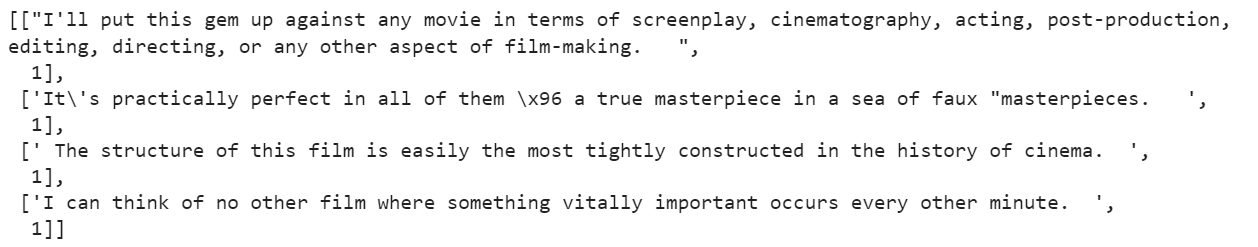

Transformemos en data frame la lista recién generada de los comentarios (review) y evaluaciones (label) del conjunto de evaluaciones de películas IMBD:

In [17]:
dfii = pd.DataFrame(newdfi, columns=['review','label'])

dfii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [18]:
# y concatenamos los tres conjuntos para tener finalmente los 3000 registros:

df = pd.concat([dfa, dfii, dfy], ignore_index=True)   # Tienes que usar el "ignore_index", de lo contrario reincia cada
                                                      # vez de 0 a 999 los índices.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


La salida esperada anterior debe ser semajante a los siguiente:

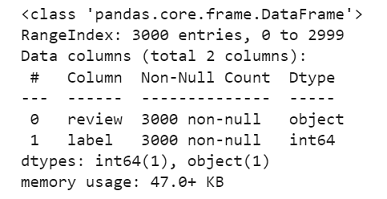

In [19]:
df['label'].value_counts()   # Recordemos que tenemos un 50% de comentarios positivos y de negativos.

label
0    1500
1    1500
Name: count, dtype: int64

In [20]:
df.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


##**Pregunta - 3:**

Sabemos que existen comentarios muy diversos. Por ejemplo, observa los registros 1125 y 1788, cuyas salidas deben de ser 10/10. De los 3000, dos de los comentarios fueron simplemente de esta forma.

Cuando apliques el proceso de limpieza en la pregunta 4, como solo consideraremos caracteres alfabéticos, estos dos registros quedarán vacíos.

En particular ¿cómo tratarías estos dos comentarios? ¿Simplemente los descartarías? ¿Los incluirías haciendo algún ajuste particular? ¿Alguna otra decisión que consideres adecuada para estos dos casos?

**Incluye a continuación tus comentarios sobre la decisión que tomarías para el tratamiento en particular de estos dos registros, 1125 y 1788. Justifica tu respuesta.**

In [89]:
df.iloc[1300,:]   # verificando salida / control en otro caso

review    I recommend this for EVERYONE who loves film, ...
label                                                     1
Name: 1300, dtype: object

In [88]:
df.iloc[1500,:]   # verificando salida / control en otro caso

review    The entire audience applauded at the conclusio...
label                                                     1
Name: 1500, dtype: object

In [86]:
df.iloc[1125,:]   # verificando tu salida

review    10/10  
label           1
Name: 1125, dtype: object

In [21]:
df.iloc[1788,:]   # verificando tu salida

review    10/10  
label           1
Name: 1788, dtype: object

########################################################
##### **AGREGA AQUÍ TUS COMENTARIOS - Pregunta 3:**

Dado que estos tokens tienen una frecuencia muy baja y carecen de contexto adicional, en este punto sería prudente descartarlos y, en una etapa posterior de refinamiento de la tokenización, podríamos considerar la inclusión de  caracteres especiales. Debido a su baja frecuencia, su contribución al peso de los tokens sería mínima al aplicar métricas de frecuencia.

##### **FIN PARA AGREGAR TUS COMENTARIOS**
#########################################################

In [22]:
 # Separamos la información:
 #     La "X" serán los datos de entrada, los comentarios.
 #     La "Y" será la variable de salida, la evaluación.
 # Ambos, X y Y son "Series"

X = df.review     # Serie de strings
Y = df.label      # Serie de enteros 0s y 1s

assert X.shape == (3000,)           # verificando que tenemos la dimensiones esperadas.
assert Y.shape == (3000,)

##**Pregunta - 4:**

**En esta etapa deberás llevar a cabo el procesamiento, limpieza y tokenización de los comentarios de texto.**

Deberás de incluir los procesos que se indicarán a continuación, aunque no necesariament deben ser en este orden. De hecho deberás estar revisando la salida de algunos de los registros para que determines cual consideras podría ser el mejor orden de estos pasos.

La incluiremos en una función llamada "clean_tok()" ya que es la tokenización y limpieza básica de cada uno de los 3000 comentarios. La entrada de esta función son cada uno de estos 3000 strings/comentarios.

Lo que nos regresa "clean_tok()" es una lista de tokens/strings ya simplificados de cada comentario de entrada.

Los pasos a incluir son los siguientes (repito, tú deberás determinar el orden de ellos, aquí se incluyen en orden alfabético):

*   **Caracteres alfabéticos:** Solo considerar caracteres alfabéticos. Por lo tanto, deberán ser eliminados signos de puntuación, caracteres especiales y números.

*   **Longitud mayor a 1:** Se deben considerar solamente tokens de longitud mayor a 1.

*   **Minúsculas:** Simplificar todo a minúsculas.

*   **Stopwords:** Eliminar las stopwords.

*   **Tokenización:** Cada comentario queda tokenizado por palabras, o cadena de caracteres alfabéticos.

Por ejemplo, si el primer comentario de X fuera el string 'All you need is love!', lo que nos regresaría clean_tok() sería la lista de strings ['need', 'love'] que llamaremos "tokens".

In [23]:
def clean_tok(doc):
  ##############################################################################
  # AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 4:

  doc_alpha_spaces = re.sub(r'[^a-zA-Z\s]', r' ', doc.lower())  # Mantener solo letras y espacios
  tokens_stopwords = re.findall(r'\b\w{2,}\b', doc_alpha_spaces)  # Encontrar palabras de longitud mayor a 1
  tokens = [i for i in tokens_stopwords if i not in mystopwords]

  # FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
  ##############################################################################

  return tokens

In [24]:
# Aplicamos el proceso de limpieza y tokenización:

Xcleantok = [clean_tok(x) for x in X]

Veamos los primeros comentarios.

En particular observa si "minutes" y "major" están como dos tokens separados en el cuarto comentario. De nos ser así, si aparecen juntos como un solo token, debes revisar tu proceso de limpieza anterior, porque esto significa que pueden existir otros muchos casos que nos llevan a esta salida no deseada. Trata de determinar el origen de este problema (y solo en caso de que te haya aparecido como un solo token "minutesmajor", en el cuarto comentario).


In [25]:
for x in Xcleantok[0:5]:
  print(x)

['no', 'way', 'plug', 'us', 'unless', 'go', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'jawbone']
['tied', 'charger', 'conversations', 'lasting', 'minutes', 'major', 'problems']
['mic', 'great']


##**Pregunta - 5:**

Esta pregunta es abierta y podrás incluir todos aquellos procesos de limpieza adicionales que desees.

Por ejemplo, puedes decidir aplicar algunos procesos (regex) para simplificar caracteres que aparecen repetidos más de dos veces, o bien simplificar algunas conjugaciones de verbos regulares para no incluir terminaciones en "s", "ed" o "ing". Puedes también decidir aplicar alguna de las técnicas de stemming o de lemmatization, etc.

NOTA: Deberás aplicar al menos dos procesos de limpieza o normalización adicionales en esta función que llamamos simplemente clean_doc().

La entrada son cada una de las listas con los comentarios tokenizados de Xcleantok y la salida es una lista de tokens simplficados/normalizados con el nombre de "tokens". En dado caso, algunos de los comentarios tokenizados pudieran no surgir cambio alguno bajo esta función.

Recuerda que el objetivo de esta función "clean_doc()" es tener datos más limpios para el proceso de entrenamiento con los algoritmos de aprendizaje automático que se realizarán en las últimas preguntas.

Puedes inspeccionar de manera aleatoria algunos de los 3000 registros para determinar qué procesos de limpieza adicionales incluir.

In [26]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 5:

# Aquí puedes incluir las librerías, paquetes o líneas de código necesarias para
# el proceso de limpieza adicional de esta pregunta:

from nltk.stem import PorterStemmer

def clean_doc(doc):
  ##############################################################################
  # AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 5:

  doc_simplified = [re.sub(r'(.)\1{2,}', r'\1\1', token) for token in doc]# Simplificar caracteres repetidos más de dos veces

  doc_simplified = [re.sub(r'(ed|ing)$', '', token) for token in doc_simplified]# Simplificar algunas conjugaciones de verbos regulares

  ps = PorterStemmer()# Aplicar stemming
  tokens = [ps.stem(token) for token in doc_simplified]

  return tokens

  # FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
  ##############################################################################

In [27]:
# Aplicamos el proceso de limpieza/normalización adicionales:

Xclean = [clean_doc(x) for x in Xcleantok]

In [28]:
Xclean[0:5]         # Veamos los primero registros para ver cómo va quedando el resultado.

[['no', 'way', 'plug', 'us', 'unless', 'go', 'convert'],
 ['good', 'case', 'excel', 'valu'],
 ['great', 'jawbon'],
 ['ti', 'charger', 'convers', 'last', 'minut', 'major', 'problem'],
 ['mic', 'great']]

##**Pregunta - 6:**

En esta pregunta deberás generar la nube de palabras de cada clase: la de los comentarios positivos y la de los comentarios negativos.

En la primera parte de esta pregunta y a partir del conjunto de comentarios obtenido hasta ahora, Xclean, deberás obtener el string de comentarios positivos llamada "pt" y el de comentarios negativos "nt".

En la parte 2 deberás mostrar las dos nubes de palabras: la nube de palabras de los comentarios positivos y la nube de palabras de los comentarios negativos.

En la parte 3 de este ejercicio deberás incluir tus comentarios de lo que observas de ambas nubes de palabras.

Igualmente deberás incluir los paquetes o librerías necesarios.

In [29]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 6 - parte 1:

p_tok = [token for doc, tag in zip(Xclean, Y) for token in doc if tag == 1]
n_tok = [token for doc, tag in zip(Xclean, Y) for token in doc if tag == 0]

pt = ' '.join(p_tok)
nt = ' '.join(n_tok)

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

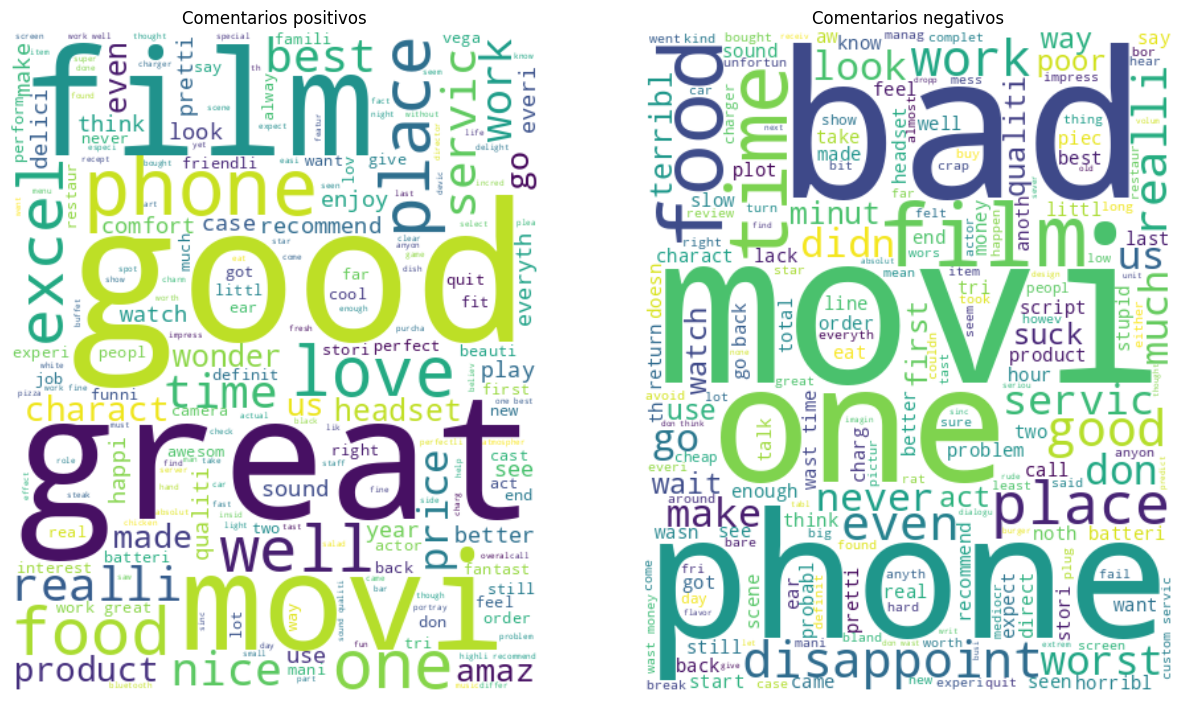

In [93]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 6 - parte 2:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, ax, title):
    # Configurar la nube de palabras con colores personalizados y mayor tamaño vertical
    wordcloud = WordCloud(background_color='white', colormap='viridis', height=500).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(title)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 30))
generate_wordcloud(pt, ax1, 'Comentarios positivos')
generate_wordcloud(nt, ax2, 'Comentarios negativos')
plt.show()

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

######################################################################
###### **AGREGA AQUÍ TUS COMENTARIOS - Pregunta 6 - parte 3:**

Se puede notar que tanto la nube de palabras de comentarios positivos como la de comentarios negativos comparten ciertos términos.
Se puede observar que muchas de estas palabras, si se consideran individualmente, no tienen una clara connotación positiva o negativa. Es posible que este problema se pueda resolver al aplicar técnicas heurísticas de frecuencia para asignar pesos, esto ayudaría a distinguir mejor la relevancia y el impacto de estos términos en cada conjunto de comentarios.

###### **FIN PARA AGREGAR TUS COMENTARIOS.**
######################################################################

###**Train-Validation-Test**

Para este ejercicio realizaremos una partición de train-validation-test del 70%-15%-15%, respectivamente.

Obviamente la distribución de esta partición puede ser otro de los hiperparámetros a determinar, pero para fines de este ejercicio consideraremos dichos valores.

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xclean, Y, train_size=.70, shuffle=True, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)

print('X,y Train:', len(x_train), len(y_train))      # los "x_" son "list" y los "y_" son "Series"
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


###Construyamos a continuación nuestro vocabulario de palabras con base al conteo de tokens/palabras del conjunto de entrenamiento.

In [32]:
from collections import Counter

In [33]:
midiccionario = Counter()

for k in range(len(x_train)):
  midiccionario.update(x_train[k])


print('Longitud del diccionario:', len(midiccionario))
print('\n(word,frequency):')
print(midiccionario.most_common(10))

Longitud del diccionario: 3221

(word,frequency):
[('not', 219), ('good', 164), ('movi', 140), ('great', 139), ('phone', 134), ('film', 130), ('work', 113), ('time', 102), ('one', 100), ('like', 89)]


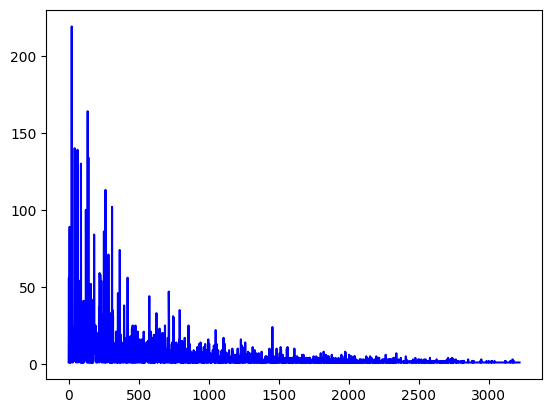

In [50]:
# Veamos la gráfica de palabras nuestro diccionario con base a la frecuencia de las palabras/tokens:

plt.plot(list(np.arange(len(midiccionario))), list(midiccionario.values()), color='blue')
plt.show()

###Descartemos palabras cuya frecuencia en el conjunto de entrenamiento es muy pequeña:

##**Pregunta - 7:**

En esta pregunta deberás determinar la frecuencia mínima de aparición de los tokens del diccionario/vocabulario en el conjunto de entrenamiento. Es usual que al menos se filtren los tokens de frecuencia 1, ya que usualmente no dan mayor información.

Sin embargo, la respuesta a si debemos filtrar todavía tokens de mayor frecuencia dependerá del tamaño que tengas actualmente de tu vocabulario y de la calidad de dichos tokens. Una manera de determinar dicha calidad de los tokens es con el resultado de los modelos de aprendizaje (regresión logística, random-forest, etc.) que aplicarás en los ejercicios de la última parte de esta Actividad.

Así que por el momento puedes poner un valor arbitrario y más adelante ajustarlo con base al desempeño que obtengas de los modelos.

Sin embargo, debes cuidar que la frecuencia de los tokens no la consideres demasiado grande, que empieces a generar una gran cantidad de comentarios vacíos en tu conjunto de entrenamiento.

Llamaremos "min_freq" a la frecuencia mínima de aparición de un token para considerarlo dentro del vocabulario/diccionario. Debe ser un número entero.

Llamaremos "midicc" al nuevo diccionario que generes con tokens de frecuencia natural (es decir, de conteo) mayor o igual a "min_freq".

In [51]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 7:

min_freq = 2

mydicc_unfiltered = Counter(token for sublist in Xclean for token in sublist)# Contar la frecuencia

midicc = {token: freq for token, freq in mydicc_unfiltered.items() if freq >= min_freq}# Filtrar tokens con frecuencia mayor o igual a min_freq

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

print('Nueva longitud del nuevo vocabulario:', len(midicc))
print(list(midicc.items())[0:5])     # veamos algunos elementos del diccionario.

Nueva longitud del nuevo vocabulario: 1868
[('no', 83), ('way', 48), ('plug', 13), ('us', 65), ('unless', 7)]


###Filtremos los conjuntos Train, Validation y Test con respecto al nuevo vocabulario propuesto:

In [52]:
train_x = []
for ss in x_train:
  train_x.append([w for w in ss if w in midicc])

val_x = []
for ss in x_val:
  val_x.append([w for w in ss if w in midicc])

test_x = []
for ss in x_test:
  test_x.append([w for w in ss if w in midicc])

In [53]:
# Podemos ver algunos de los comentarios de entrenamiento, antes y después
# de incluir la condición de la frecuencia mínima de ocurrencia de un token:

for k in range(3):
  print('Antes:', x_train[k])
  print('Después:', train_x[k])

Antes: ['co', 'star', 'don', 'fare', 'much', 'better', 'peopl', 'like', 'morgan', 'freeman', 'jonah', 'hill', '', 'helm', 'wast']
Después: ['star', 'don', 'fare', 'much', 'better', 'peopl', 'like', 'morgan', 'jonah', 'hill', '', 'wast']
Antes: ['tonight', 'elk', 'filet', 'special', 'suck']
Después: ['tonight', 'filet', 'special', 'suck']
Antes: ['paid', 'bill', 'not', 'tip', 'felt', 'server', 'terribl', 'job']
Después: ['paid', 'bill', 'not', 'tip', 'felt', 'server', 'terribl', 'job']


###Obtengamos las matrices de conteo document-term-matrix como matrices dispersas (sparse matrices ). Para ello requerimos que cada comentario esté como un solo string.

In [54]:
train_x_docs = []
for k in range(len(train_x)):
  train_x_docs.append(' '.join(train_x[k]))

val_x_docs = []
for k in range(len(val_x)):
  val_x_docs.append(' '.join(val_x[k]))

test_x_docs = []
for k in range(len(test_x)):
  test_x_docs.append(' '.join(test_x[k]))



# Verifica que los primeros comentarios de Train están cada uno como un solo string:
for k in range(3):
  print(train_x_docs[k])

star don fare much better peopl like morgan jonah hill  wast
tonight filet special suck
paid bill not tip felt server terribl job


###Ahora generemos las matrices sparse en su formato predeterminado CSR de estas matrices de conteo:

In [55]:
mivocab = list(midicc.keys())     # Obtenemos nuestro vocabulario de tokens/palabras.

#mivocab.sort()    # Usualmente se ordenan alfabéticamente, pero para visualizar algunos de los valores
                   # no cero de las matrices, por el momento no lo haremos.



# Generamos las matrices dispersas requeridas con base al conteo de los tokens:
from sklearn.feature_extraction.text import CountVectorizer

countvectorizer = CountVectorizer(vocabulary=mivocab)
train_x_count = countvectorizer.fit_transform(train_x_docs)
val_x_count = countvectorizer.transform(val_x_docs)
test_x_count = countvectorizer.transform(test_x_docs)

count_tokens = countvectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = train_x_count.toarray(),  columns = count_tokens)
print(df_countvect.iloc[0:3,6:18])   # veamos las frecuencias de los primeros comentarios.

   good  case  excel  valu  great  jawbon  charger  convers  last  minut  \
0     0     0      0     0      0       0        0        0     0      0   
1     0     0      0     0      0       0        0        0     0      0   
2     0     0      0     0      0       0        0        0     0      0   

   major  problem  
0      0        0  
1      0        0  
2      0        0  


In [56]:
p_sparse = 1 - train_x_count.count_nonzero() / (train_x_count.shape[0] * train_x_count.shape[1])    # Sparsity : Porcentaje de valores de 0.
print('Porcentaje de valores cero de la matriz sparse de entrenamiento: %.1f%%' % (100*p_sparse))

Porcentaje de valores cero de la matriz sparse de entrenamiento: 99.7%


##**Pregunta - 8:**

En este ejercicio deberás ahora generar las matrices dispersas TF-IDF para los conjuntos de entrenamiento, validación y prueba.

Deberás usar el vocabulario "mivocab" para generar dichas matrices.

Dichas matrices las llamaremos "train_x_tfidf", "val_x_tfidf" y "test_x_tfidf".

Deberás agregar además las librerías o módulos necesarios.

Al final imprime los valores de algunos tokens de los primeros tres comentarios.

In [62]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 8:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvec = TfidfVectorizer(vocabulary = mivocab)# Crear vectorizador

train_x_tfidf = tfidfvec.fit_transform(train_x_docs)# Generar las matrices dispersas
val_x_tfidf = tfidfvec.transform(val_x_docs)
test_x_tfidf = tfidfvec.transform(test_x_docs)

tfidf_tokens = tfidfvec.get_feature_names_out()# Obtener los nombres de los tokens

df_test_x_tfidf = pd.DataFrame(data = test_x_tfidf[0:3].toarray(), columns = tfidf_tokens)# Crear un DataFrame para imprimir valores de tokens
print(df_test_x_tfidf)

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

         no  way  plug   us  unless        go  good  case  excel  valu  ...  \
0  0.000000  0.0   0.0  0.0     0.0  0.000000   0.0   0.0    0.0   0.0  ...   
1  0.366476  0.0   0.0  0.0     0.0  0.352774   0.0   0.0    0.0   0.0  ...   
2  0.000000  0.0   0.0  0.0     0.0  0.000000   0.0   0.0    0.0   0.0  ...   

   spice  mid  flavorless  nacho  tribut  salsa  fell  employe  heat  \
0    0.0  0.0         0.0    0.0     0.0    0.0   0.0      0.0   0.0   
1    0.0  0.0         0.0    0.0     0.0    0.0   0.0      0.0   0.0   
2    0.0  0.0         0.0    0.0     0.0    0.0   0.0      0.0   0.0   

   undercook  
0        0.0  
1        0.0  
2        0.0  

[3 rows x 1868 columns]


##**Pregunta - 9:**

###A continuación, usando Sklearn, deberás aplicar los modelos de regresión logística (lo llamaremos modeloLRcount), ranfom-forest para clasificación (lo llamaremos modeloRFcount) y naive-bayes en su opción MultinomialNB (lo llamaremos modeloNBcount).

###Deberás de utilizar las matrices de conteo "train_x_count", "val_x_count" y "test_x_count".

###Con el mejor modelo obtenido, se usará el conjunto de prueba (test) para obtener el desempeño (Accuracy) final y su matriz de confusión.

###Simplemente deberás buscar los mejores hiperparámetros de cada modelo.

###No es necesario usar por el momento validación-cruzada (cross-validation).

###Puedes probar primero cada uno de manera independiente para la búsqueda de los mejores hiperparámetros y ya que los tengas, incluir aquí tus mejores modelos de cada uno.

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [74]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 9:

modeloLRcount = LogisticRegression()
modeloLRcount.fit(train_x_count, y_train)

modeloRFcount = RandomForestClassifier()
modeloRFcount.fit(train_x_count, y_train)

modeloNBcount = MultinomialNB()
modeloNBcount.fit(train_x_count, y_train)

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################


print('LR: Train-accuracy: %.2f%%' % (100*modeloLRcount.score(train_x_count, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRcount.score(val_x_count, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFcount.score(train_x_count, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFcount.score(val_x_count, y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBcount.score(train_x_count, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBcount.score(val_x_count, y_val)))

LR: Train-accuracy: 95.67%
LR: Val-accuracy: 86%

RF: Train-accuracy: 99.90%
RF: Val-accuracy: 84.44%

NB: Train-accuracy: 92.38%
NB: Val-accuracy: 84.00%


In [75]:
##############################################################################
# AGREGA AQUÍ EL NOMBRE DE TU MEJOR MODELO OBTENIDO CON COUNTER:

mejor_modelo_Count = modeloRFcount # incluye el nombre, modeloXXcount, de tu mejor modelo.

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

print('Test-accuracy con el mejor modelo de Conteo %.2f%%' % (100*mejor_modelo_Count.score(test_x_count, y_test)))

from sklearn.metrics import confusion_matrix

pred = mejor_modelo_Count.predict(test_x_count)
print('\nMatriz de confusión con el mejor modelo de Conteo:')
print(confusion_matrix(y_test, pred, labels=[0,1]))

print('\nMatriz de confusión con el mejor modelo de Conteo en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0,1]) / pred.shape[0])

Test-accuracy con el mejor modelo de Conteo 74.89%

Matriz de confusión con el mejor modelo de Conteo:
[[149  67]
 [ 46 188]]

Matriz de confusión con el mejor modelo de Conteo en proporciones:
[[0.33111111 0.14888889]
 [0.10222222 0.41777778]]


##**Pregunta - 10:**

###Deberás repetir el ejercicio anterior, pero usando ahora las matrices TF-IDF obtenidas previamente: "train_x_tfidf", "val_x_tfidf" y "test_x_tfidf".

###Llamaremos a los modelos modeloXXtfidf, para LR, RF y NB.

In [76]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 10:

modeloLRtfidf = LogisticRegression()
modeloLRtfidf.fit(train_x_tfidf, y_train)

modeloRFtfidf = RandomForestClassifier()
modeloRFtfidf.fit(train_x_tfidf, y_train)

modeloNBtfidf = MultinomialNB()
modeloNBtfidf.fit(train_x_tfidf, y_train)


# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################


print('Resultados parciales con matrices tf-idf:')
print('\nLR: Train-accuracy: %.2f%%' % (100*modeloLRtfidf.score(train_x_tfidf, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRtfidf.score(val_x_tfidf, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFtfidf.score(train_x_tfidf, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFtfidf.score(val_x_tfidf, y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBtfidf.score(train_x_tfidf, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBtfidf.score(val_x_tfidf, y_val)))

Resultados parciales con matrices tf-idf:

LR: Train-accuracy: 93.81%
LR: Val-accuracy: 86%

RF: Train-accuracy: 99.90%
RF: Val-accuracy: 85.11%

NB: Train-accuracy: 93.10%
NB: Val-accuracy: 83.78%


In [78]:
##############################################################################
# AGREGA AQUÍ EL NOMBRE DE TU MEJOR MODELO OBTENIDO CON TF-IDF:

mejor_modelo_Tfidf = modeloRFtfidf # incluye el nombre, modeloXXtfidf, de tu mejor modelo.

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

print('Test-accuracy con el mejor modelo Tf-idf %.2f%%' % (100*mejor_modelo_Tfidf.score(test_x_tfidf, y_test)))

pred = mejor_modelo_Tfidf.predict(test_x_tfidf)
print('\nMatriz de confusión con el mejor modelo Tf-idf:')
print(confusion_matrix(y_test, pred, labels=[0,1]))

print('\nMatriz de confusión con el mejor modelo de Tf-idf en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0,1]) / pred.shape[0])

Test-accuracy con el mejor modelo Tf-idf 75.56%

Matriz de confusión con el mejor modelo Tf-idf:
[[163  53]
 [ 57 177]]

Matriz de confusión con el mejor modelo de Tf-idf en proporciones:
[[0.36222222 0.11777778]
 [0.12666667 0.39333333]]


##**Pregunta - 11:**

###Finalmente incluye tus conclusiones finales de la Actividad.

###En particular, indica cuál técnica resultó mejor en este problema, ¿usando matrices de conteo o tf-idf?

###Indica también a qué crees que se debe la diferencia entre los valores de los Falsos-Negativos y Falsos-Positivos de la mejor matriz de confusión que obtuviste. ¿Qué implicaciones podrían tener cada uno de estos errores?

##**Como nota complementaria, se esperaría que tu mejor modelo final mínimamente debiera alcanzar un 72% de buen desempeño (accuracy), pero puede ser mayor.**

######################################################################
###### **AGREGA AQUÍ TUS CONCLUSIONES FINALES - Pregunta 11:**


- Hay muchas palabras que se utilizan en ambos tipos de comentarios. Esto genera una baja correlación entre las palabras individuales y las etiquetas de los comentarios. Es posible que gran parte de la información esté contenida en el contexto que rodea a cada palabra, lo que indica la importancia de considerar las palabras vecinas para comprender su significado en el contexto del comentario.
-  A pesar de experimentar con diferentes combinaciones de hiperparámetros, los mejores resultados se obtuvieron con los valores predeterminados para cada los modelos ya que ajustar otros, me generaba error y para corregirlo, solia usar cross validation, pero se sugeria no hacerlo, entonces, no se usó al final. Esto puede indicar que los modelos predeterminados son suficientes para este conjunto de datos específico o que la búsqueda de hiperparámetros necesitaría ajustes adicionales para obtener mejoras significativas.
-  Se señala una observación interesante en relación con los valores de falsos positivos (FP) y falsos negativos (FN) en la matriz de confusión. Este hallazgo destaca la complejidad de la interpretación de los comentarios y la necesidad de técnicas más avanzadas para capturar su verdadero significado.


###### **FIN PARA AGREGAR TUS CONCLUSIONES FINALES.**
######################################################################

#**FIN DE LA ACTIVIDAD DE LAS SEMANAS 3 Y 4**